# "Tree" regression


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error



In [11]:
df = pd.read_excel("housing_data.xlsx",)
df.head()

X = df[["LSTAT"]].values
y = df["MEDV"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [12]:
def reg_plot(ax, X, y, y_pred, title, color="steelblue"):
    ax.scatter(X, y, c=color, edgecolor="white", s=70)
    ax.plot(X, y_pred, color="black", lw=2)
    ax.set_title(title)
    return


def res_plot(ax, y_pred, y, title, color="steelblue"):
    ax.scatter(y_pred, y_pred - y, c=color, marker="o", edgecolor="white", s=70)
    ax.hlines(y=0, xmin=-10, xmax=50, color="black", lw=2)
    ax.axes.set_aspect("equal")
    ax.set_title(title)


def store_results(df, model_name, y_train, y_test, y_train_pred, y_test_pred):

    MSE_train = mean_squared_error(y_train, y_train_pred)
    MSE_test = mean_squared_error(y_test, y_test_pred)

    R2_train = r2_score(y_train, y_train_pred)
    R2_test = r2_score(y_test, y_test_pred)

    data = {
        "Model": model_name,
        "MSE Train": [MSE_train],
        "MSE Test": [MSE_test],
        "R2 Train": [R2_train],
        "R2 Test": [R2_test],
    }
    dft = pd.DataFrame(data=data)
    return df.append(dft, ignore_index=True)


In [13]:
def run_model_tree(model, model_name, X_train, y_train, X_test, y_test, df):

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Indices for sorting during plotting
    idx_train = np.argsort(X_train, axis=0).ravel()
    idx_test = np.argsort(X_test, axis=0).ravel()

    fig, ax = plt.subplots(
        1, 2, figsize=(10, 5), constrained_layout=True, sharex=True, sharey=True
    )
    reg_plot(
        ax=ax[0],
        X=X_train[idx_train, :1],
        y=y_train[idx_train],
        y_pred=y_train_pred[idx_train],
        title="Train",
    )
    reg_plot(
        ax=ax[1],
        X=X_test[idx_test, :1],
        y=y_test[idx_test],
        y_pred=y_test_pred[idx_test],
        title="test",
        color="limegreen",
    )
    fig.supxlabel("Lower status of the population [LSTAT]")
    fig.supylabel("Median value of homes in $1000s [MEDV]")

    fig, ax = plt.subplots(
        1, 2, figsize=(9, 5), constrained_layout=True, sharex=True, sharey=True
    )
    res_plot(ax=ax[0], y_pred=y_train_pred, y=y_train, title="Train")
    res_plot(ax=ax[1], y_pred=y_test_pred, y=y_test, title="Test", color="limegreen")
    fig.supxlabel("Predicted values")
    fig.supylabel("Residual")

    df = store_results(
        df=df,
        model_name=model_name,
        y_train=y_train,
        y_train_pred=y_train_pred,
        y_test=y_test,
        y_test_pred=y_test_pred,
    )

    return df


## Decision tree regressor


,Model,MSE Train,MSE Test,R2 Train,R2 Test
0,Tree-1,45.399831,54.463138,0.464401,0.345910
1,Tree-2,26.628228,36.383432,0.685856,0.563043
2,Tree-3,23.515900,31.578199,0.722574,0.620753
3,Tree-4,20.575204,37.278680,0.757266,0.552291
4,Tree-5,17.232067,38.926129,0.796707,0.532506
5,Tree-None,2.783710,44.613355,0.967159,0.464204


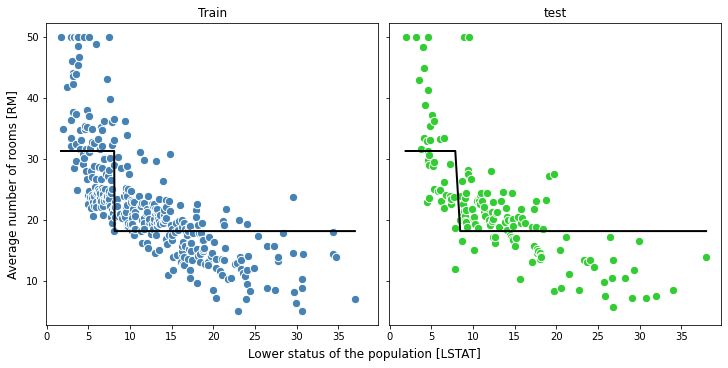

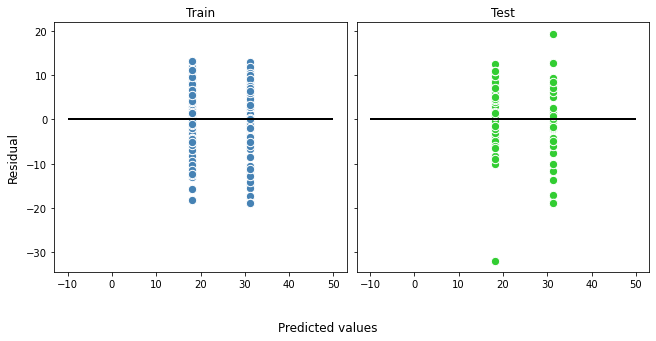

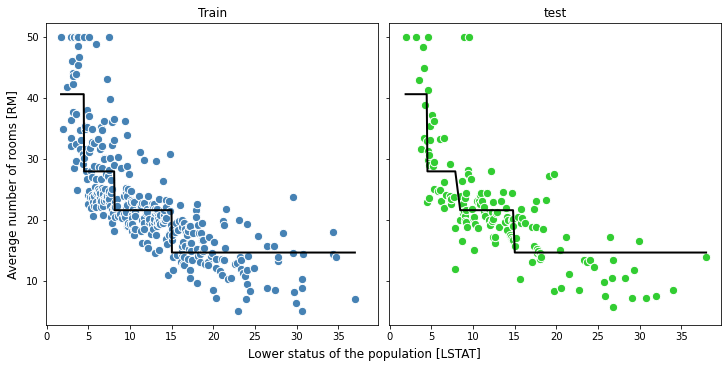

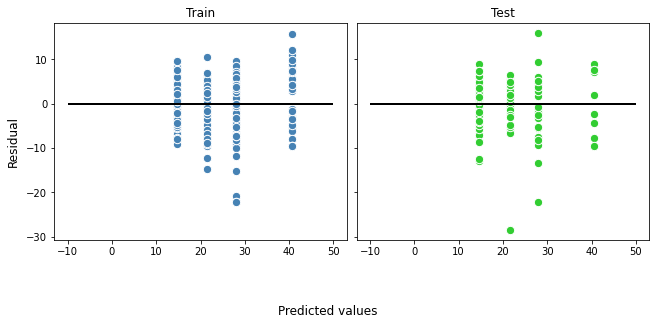

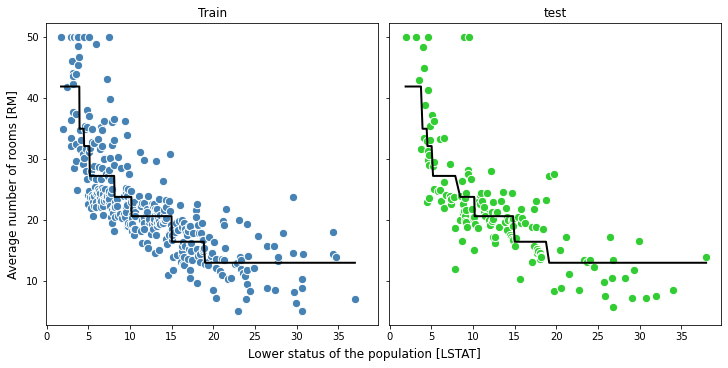

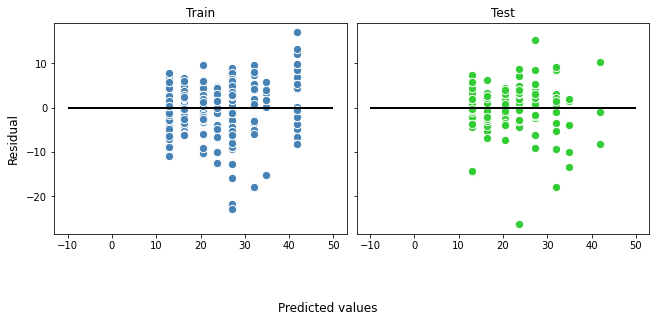

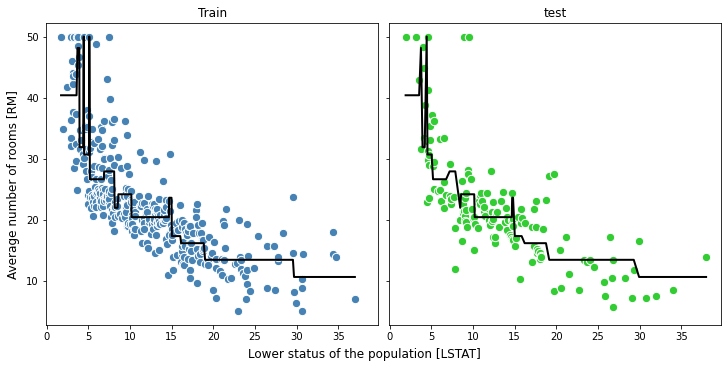

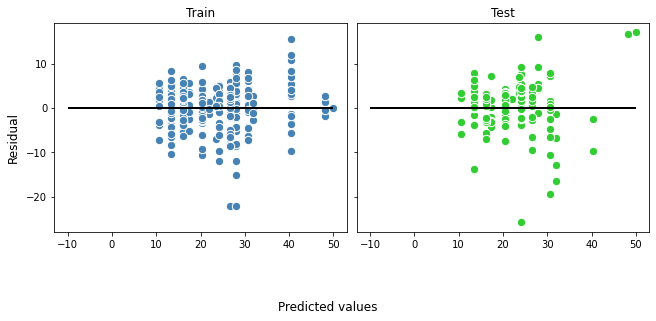

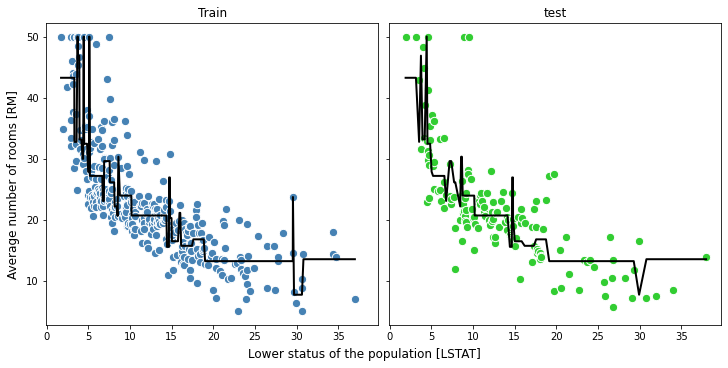

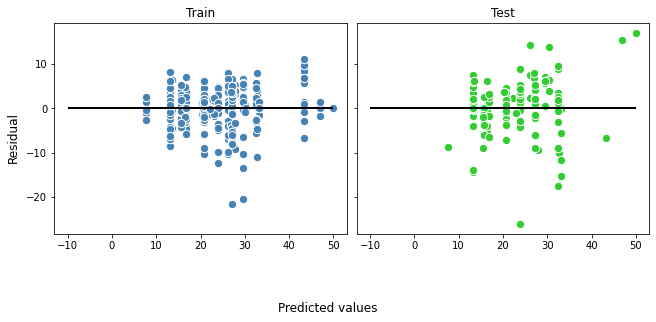

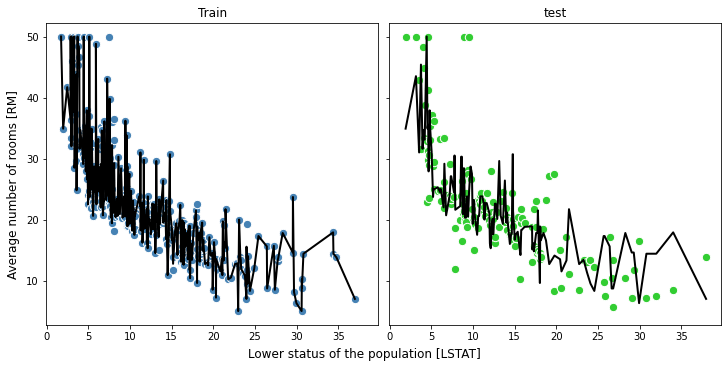

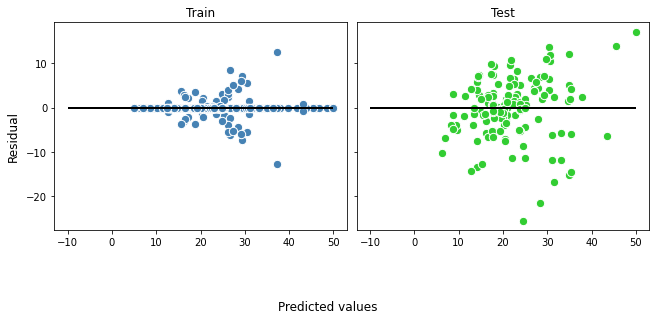

In [14]:
from sklearn.tree import DecisionTreeRegressor


max_depths = [1, 2, 3, 4, 5, None]

dfAll = pd.DataFrame()
for max_depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=max_depth)
    dfAll = run_model_tree(
        model=tree,
        model_name=f"Tree-{max_depth}",
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        df=dfAll,
    )

display(dfAll)


,Model,MSE Train,MSE Test,R2 Train,R2 Test
0,Tree-1,45.399831,54.463138,0.464401,0.345910
1,Tree-2,26.628228,36.383432,0.685856,0.563043
2,Tree-3,23.515900,31.578199,0.722574,0.620753
3,Tree-4,20.575204,37.278680,0.757266,0.552291
4,Tree-5,17.232067,38.926129,0.796707,0.532506
5,Tree-None,2.783710,44.613355,0.967159,0.464204
6,Forest-10,8.187137,38.623326,0.903413,0.536143
7,Forest-100,7.213183,38.179498,0.914903,0.541473
8,Forest-500,7.073312,37.928427,0.916553,0.544488
9,Forest-1000,7.071674,37.934550,0.916573,0.544415


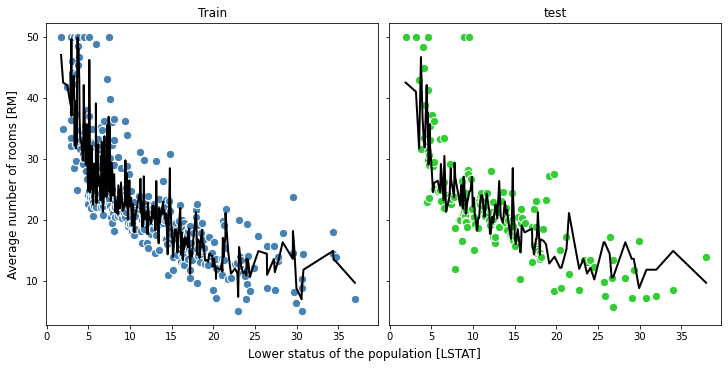

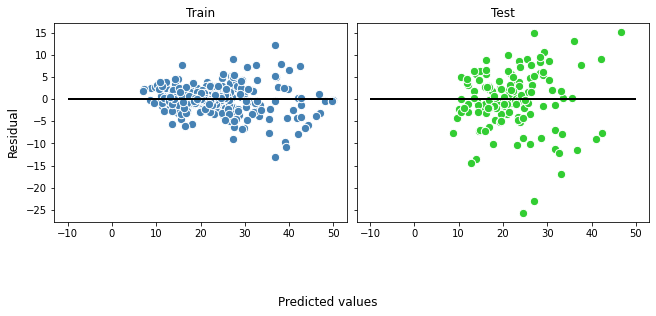

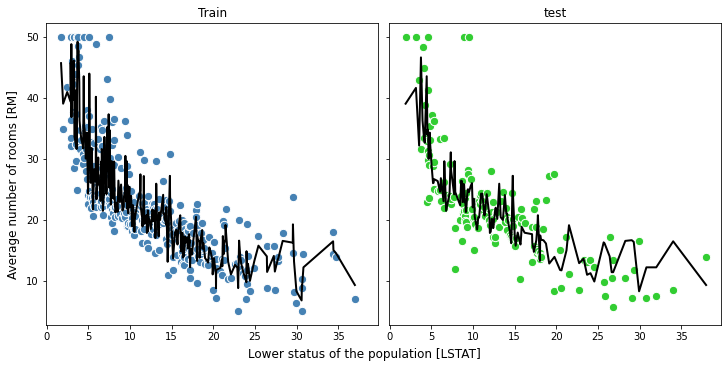

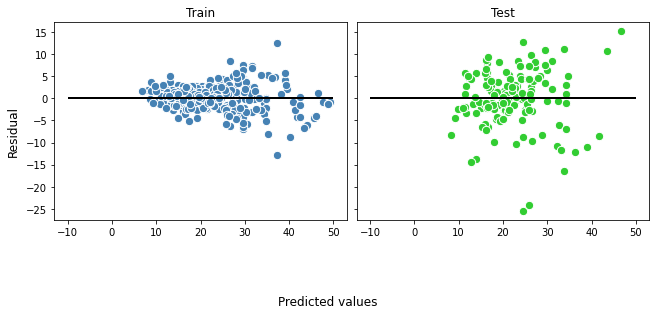

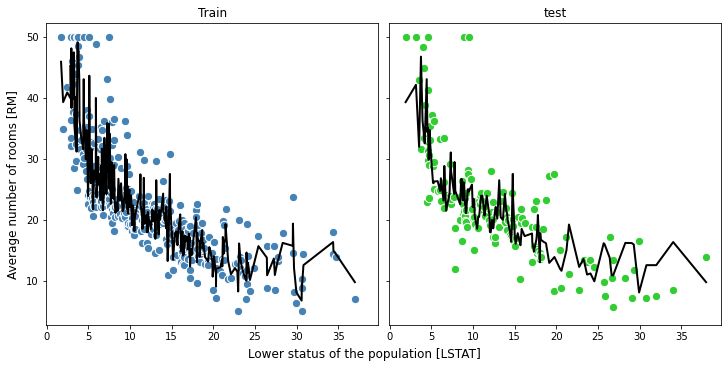

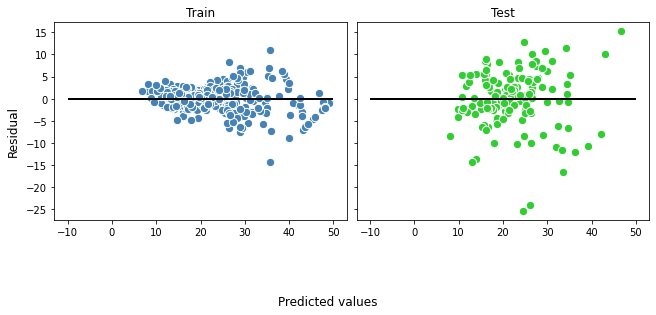

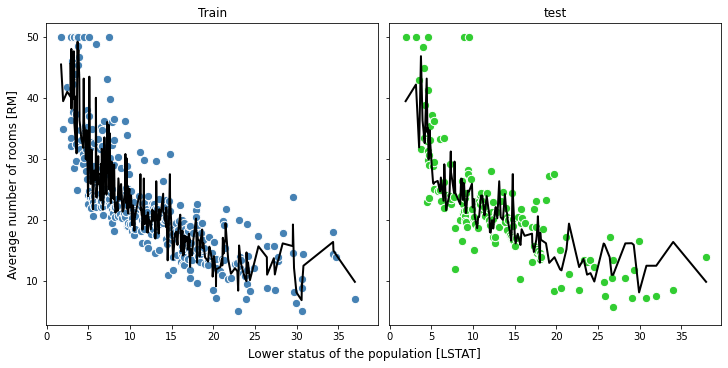

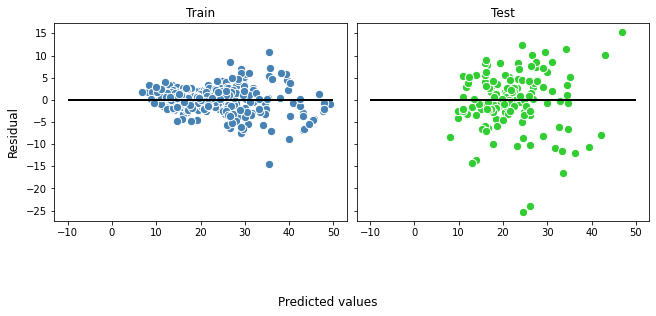

In [15]:
from sklearn.ensemble import RandomForestRegressor

params = [10, 100, 500, 1000]

for param in params:
    forest = RandomForestRegressor(
        n_estimators=param, criterion="mse", random_state=1, n_jobs=-1
    )
    dfAll = run_model_tree(
        model=forest,
        model_name=f"Forest-{param}",
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        df=dfAll,
    )

display(dfAll)


## Gradient boost regression


Learning rate set to 0.034747
0:	learn: 9.0031631	total: 792us	remaining: 792ms
1:	learn: 8.8076506	total: 1.42ms	remaining: 707ms
2:	learn: 8.6242022	total: 2.07ms	remaining: 687ms
3:	learn: 8.4455571	total: 2.7ms	remaining: 673ms
4:	learn: 8.2741680	total: 3.36ms	remaining: 669ms
5:	learn: 8.1082870	total: 4.01ms	remaining: 664ms
6:	learn: 7.9522710	total: 4.68ms	remaining: 664ms
7:	learn: 7.8045490	total: 5.65ms	remaining: 700ms
8:	learn: 7.6767588	total: 6.4ms	remaining: 705ms
9:	learn: 7.5387406	total: 7.09ms	remaining: 702ms
10:	learn: 7.4120187	total: 7.78ms	remaining: 699ms
11:	learn: 7.2896620	total: 8.42ms	remaining: 693ms
12:	learn: 7.1726945	total: 8.88ms	remaining: 674ms
13:	learn: 7.0673779	total: 9.52ms	remaining: 671ms
14:	learn: 6.9603407	total: 10.2ms	remaining: 669ms
15:	learn: 6.8502053	total: 10.8ms	remaining: 667ms
16:	learn: 6.7513396	total: 11.5ms	remaining: 665ms
17:	learn: 6.6572038	total: 12.2ms	remaining: 664ms
18:	learn: 6.5678091	total: 12.8ms	remaining: 6

,Model,MSE Train,MSE Test,R2 Train,R2 Test
0,Tree-1,45.399831,54.463138,0.464401,0.345910
1,Tree-2,26.628228,36.383432,0.685856,0.563043
2,Tree-3,23.515900,31.578199,0.722574,0.620753
3,Tree-4,20.575204,37.278680,0.757266,0.552291
4,Tree-5,17.232067,38.926129,0.796707,0.532506
5,Tree-None,2.783710,44.613355,0.967159,0.464204
6,Forest-10,8.187137,38.623326,0.903413,0.536143
7,Forest-100,7.213183,38.179498,0.914903,0.541473
8,Forest-500,7.073312,37.928427,0.916553,0.544488
9,Forest-1000,7.071674,37.934550,0.916573,0.544415


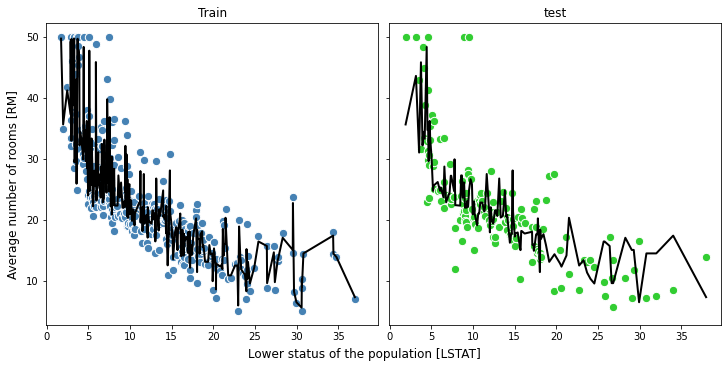

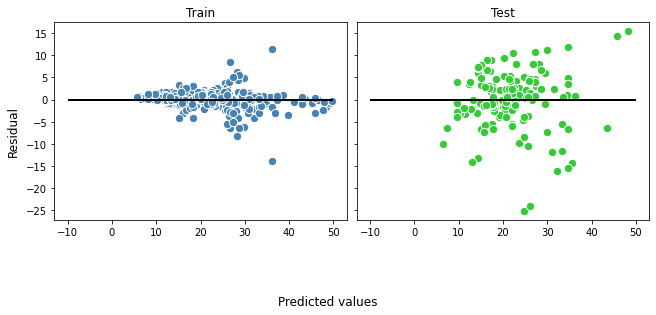

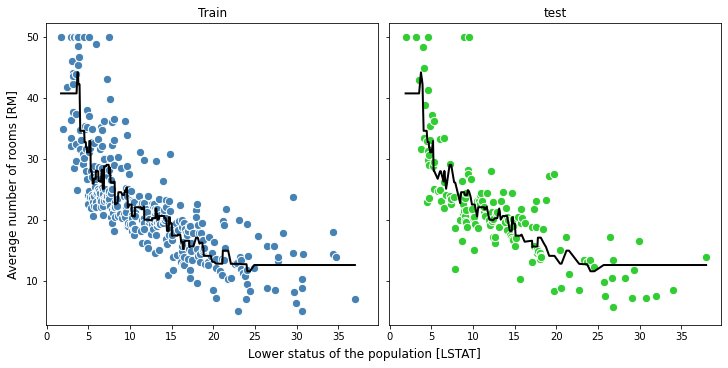

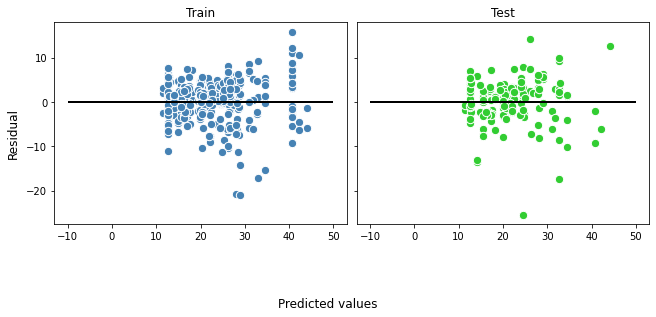

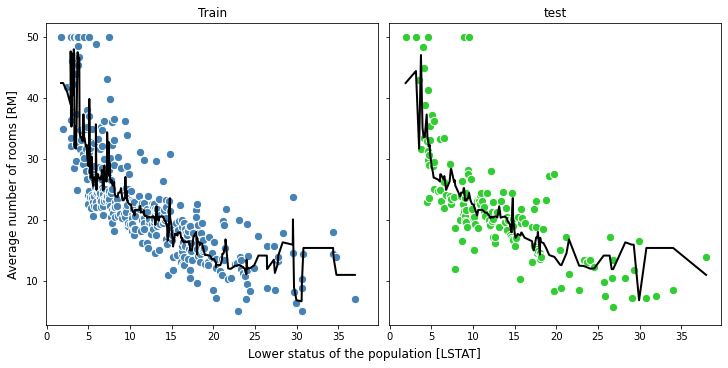

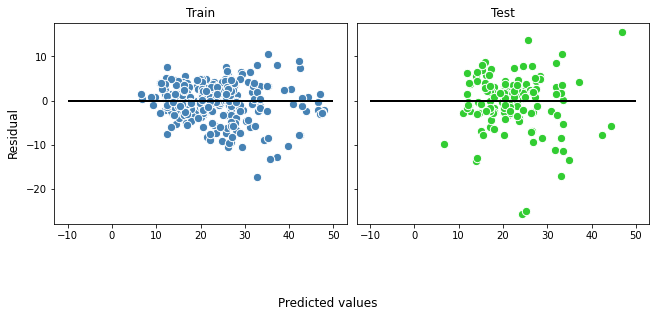

In [16]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

xgb = XGBRegressor()
light = LGBMRegressor()
cat = CatBoostRegressor()

regs = [xgb, light, cat]
names = ["XGB", "LightGBM", "CatBoost"]

for reg, name in zip(regs, names):
    dfAll = run_model_tree(
        model=reg,
        model_name=name,
        X_train=X_train,
        y_train=y_train,
        X_test=X_test,
        y_test=y_test,
        df=dfAll,
    )

display(dfAll)
